# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import statsmodels.api as sm
from io import StringIO
import requests
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Import Weather

In [2]:
filename = 'WeatherData.csv'
weather_cali = pd.read_csv(filename)
weather_cali = weather_cali.drop(['Unnamed: 0'], axis = 1)
weather_cali.head()

,Date,Temperature,PrecipIntensity,PrecipProbability,Pressure,Sunlight,DewPoint,County,State
0,2/1/19,54.899583,0.000554,0.058750,1012.112500,0.666667,48.088750,Fresno,CA
1,2/2/19,55.204583,0.042196,0.684583,1003.739167,0.583333,48.705000,Fresno,CA
2,2/3/19,53.631667,0.010879,0.372917,1007.328333,0.583333,46.943333,Fresno,CA
3,2/4/19,50.668750,0.018958,0.430833,1005.903333,0.625000,43.654583,Fresno,CA
4,2/5/19,43.509565,0.004617,0.214348,1012.170000,0.652174,34.397826,Fresno,CA


In [3]:
# Convert Date column to datetime format 
weather_cali.Date = pd.to_datetime(weather_cali.Date)
weather_cali.Date.dt.month.head()

0    2
1    2
2    2
3    2
4    2
Name: Date, dtype: int64

In [4]:
# keep vars for only 2-6 months, so Feb to June
weather2 = weather_cali[weather_cali.Date.dt.month == 2]
weather3 = weather_cali[weather_cali.Date.dt.month == 3]
weather4 = weather_cali[weather_cali.Date.dt.month == 4]
weather5 = weather_cali[weather_cali.Date.dt.month == 5]
weather6 = weather_cali[weather_cali.Date.dt.month == 6]

weather_cali = weather2.append([weather3,weather4,weather5,weather6],
                                          ignore_index = True, sort = True)
weather_cali.head()

,County,Date,DewPoint,PrecipIntensity,PrecipProbability,Pressure,State,Sunlight,Temperature
0,Fresno,2019-02-01,48.088750,0.000554,0.058750,1012.112500,CA,0.666667,54.899583
1,Fresno,2019-02-02,48.705000,0.042196,0.684583,1003.739167,CA,0.583333,55.204583
2,Fresno,2019-02-03,46.943333,0.010879,0.372917,1007.328333,CA,0.583333,53.631667
3,Fresno,2019-02-04,43.654583,0.018958,0.430833,1005.903333,CA,0.625000,50.668750
4,Fresno,2019-02-05,34.397826,0.004617,0.214348,1012.170000,CA,0.652174,43.509565


## Import Yield Data

In [5]:
filename = 'USDA_yield_county.csv'
yield_county = pd.read_csv(filename)
yield_county = yield_county.drop(['Program', 'Period', 'Geo Level', 'State ANSI','Week Ending','County ANSI','Ag District','Ag District Code', 'Zip Code', 'Region', 'watershed_code','Watershed', 'Commodity', 'Data Item', 'Domain', 'Domain Category', 'CV (%)' ], axis = 1)

yield_county.head()

,Year,State,County,Value
0,1973,OHIO,OTHER (COMBINED) COUNTIES,1.60
1,1981,OHIO,OTHER (COMBINED) COUNTIES,10.70
2,2002,OHIO,OTHER (COMBINED) COUNTIES,12.14
3,1974,OHIO,OTHER (COMBINED) COUNTIES,13.39
4,1975,OHIO,OTHER (COMBINED) COUNTIES,13.41


In [6]:
# Split into CA yield only for analysis
yield_county_ca = yield_county[yield_county.State == 'CALIFORNIA']

In [7]:
yield_county_ca.County.unique()

array(['KINGS', 'OTHER (COMBINED) COUNTIES', 'SUTTER', 'YOLO', 'MERCED',
       'SACRAMENTO', 'STANISLAUS', 'SAN JOAQUIN', 'FRESNO', 'SOLANO',
       'SAN BENITO', 'CONTRA COSTA', 'COLUSA', 'SANTA CLARA', 'MADERA',
       'GLENN', 'KERN'], dtype=object)

In [8]:
weather_cali.County.unique()

array(['Fresno', 'Kern', 'Kings', 'Merced', 'San Joaquin', 'Solano',
       'Stanislaus', 'Yolo'], dtype=object)

In [9]:
# Convert Date column to datetime format 
weather_cali.Date = pd.to_datetime(weather_cali.Date)
weather_cali.Date.dt.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Date, dtype: int64

In [10]:
# Set Year as a separete column
weather_cali['Year'] = weather_cali.Date.dt.year

In [11]:
# Set Year as a separete column
weather_cali['Year'] = weather_cali.Date.dt.year

## Weather Variable Creation - Avg, Min, Max

In [12]:
# Drop Date column 
weather_cali = weather_cali.drop(['Date'], axis = 1)

In [13]:
weather_avg = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].mean().sort_values(by='Year', ascending=False)

In [14]:
weather_min = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].min().sort_values(by='Year', ascending=False)

In [15]:
weather_max = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].max().sort_values(by='Year', ascending=False)

In [16]:
weather_avg.columns = ['Avg_Temp','Avg_DewPoint','Avg_PrInt','Avg_PrProb','Avg_Pressure','Avg_Sunlight']

In [17]:
weather_avg.columns

Index(['Avg_Temp', 'Avg_DewPoint', 'Avg_PrInt', 'Avg_PrProb', 'Avg_Pressure',
       'Avg_Sunlight'],
      dtype='object')

In [18]:
weather_min.columns

Index(['Temperature', 'DewPoint', 'PrecipIntensity', 'PrecipProbability',
       'Pressure', 'Sunlight'],
      dtype='object')

In [19]:
weather_min.columns = ['Min_Temp','Min_DewPoint','Min_PrInt','Min_PrProb','Min_Pressure','Min_Sunlight']

In [20]:
weather_max.columns

Index(['Temperature', 'DewPoint', 'PrecipIntensity', 'PrecipProbability',
       'Pressure', 'Sunlight'],
      dtype='object')

In [21]:
weather_max.columns = ['Max_Temp','Max_DewPoint','Max_PrInt','Max_PrProb','Max_Pressure','Max_Sunlight']

In [22]:
weather_max.head()

Max_Temp  Max_DewPoint  Max_PrInt  Max_PrProb  \
Year County                                                        
2019 Yolo         76.536250     56.350417   0.083881    0.993182   
     Stanislaus   76.934167     55.735833   0.024717    0.585000   
     Solano       74.459167     56.469167   0.075967    0.967619   
     San Joaquin  76.797083     55.802083   0.035652    0.618750   
     Merced       77.115417     56.960833   0.015646    0.423333   

                  Max_Pressure  Max_Sunlight  
Year County                                   
2019 Yolo          1026.416667      2.500000  
     Stanislaus    1026.284286      2.500000  
     Solano        1026.440833      2.541667  
     San Joaquin   1026.284286      2.545455  
     Merced        1026.125417      2.500000

In [23]:
weather_comb = pd.merge(weather_avg,weather_min, on =['Year','County'])

In [24]:
weather_comb = pd.merge(weather_comb,weather_max,on =['Year','County'])

In [25]:
weather_comb.head()

Avg_Temp  Avg_DewPoint  Avg_PrInt  Avg_PrProb  \
Year County                                                        
2019 Yolo         56.790117     44.158223   0.004325    0.100941   
     Stanislaus   58.586093     45.164036   0.001892    0.066609   
     Solano       55.643172     44.535474   0.003721    0.093259   
     San Joaquin  57.677041     44.942740   0.002466    0.083594   
     Merced       58.273710     46.032607   0.001370    0.042530   

                  Avg_Pressure  Avg_Sunlight   Min_Temp  Min_DewPoint  \
Year County                                                             
2019 Yolo          1014.808202      1.436492  40.855217     21.669565   
     Stanislaus    1014.861684      1.488243  42.535833     26.274348   
     Solano        1014.992753      1.453429  41.224348     21.779130   
     San Joaquin   1014.872616      1.488322  42.511304     24.877826   
     Merced        1014.947390      1.512169  41.235000     28.769565   

                  Min_PrInt  Min_PrProb  Min_Pressure  Min_Sunlight  \
Year County                                                           
2019 Yolo               0.0         0.0    999.420833      0.458333   
     Stanislaus         0.0         0.0   1000.545455      0.500000   
     Solano             0.0         0.0    999.261667      0.500000   
     San Joaquin        0.0         0.0   1000.545455      0.458333   
     Merced             0.0         0.0   1001.509583      0.541667   

                   Max_Temp  Max_DewPoint  Max_PrInt  Max_PrProb  \
Year County                                                        
2019 Yolo         76.536250     56.350417   0.083881    0.993182   
     Stanislaus   76.934167     55.735833   0.024717    0.585000   
     Solano       74.459167     56.469167   0.075967    0.967619   
     San Joaquin  76.797083     55.802083   0.035652    0.618750   
     Merced       77.115417     56.960833   0.015646    0.423333   

                  Max_Pressure  Max_Sunlight  
Year County                                   
2019 Yolo          1026.416667      2.500000  
     Stanislaus    1026.284286      2.500000  
     Solano        1026.440833      2.541667  
     San Joaquin   1026.284286      2.545455  
     Merced        1026.125417      2.500000

In [26]:
# Reset the index ==> take the vars out
weather_comb = weather_comb.reset_index()

In [27]:
weather_comb.head()

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_PrInt,Min_PrProb,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight
0,2019,Yolo,56.790117,44.158223,0.004325,0.100941,1014.808202,1.436492,40.855217,21.669565,0.0,0.0,999.420833,0.458333,76.536250,56.350417,0.083881,0.993182,1026.416667,2.500000
1,2019,Stanislaus,58.586093,45.164036,0.001892,0.066609,1014.861684,1.488243,42.535833,26.274348,0.0,0.0,1000.545455,0.500000,76.934167,55.735833,0.024717,0.585000,1026.284286,2.500000
2,2019,Solano,55.643172,44.535474,0.003721,0.093259,1014.992753,1.453429,41.224348,21.779130,0.0,0.0,999.261667,0.500000,74.459167,56.469167,0.075967,0.967619,1026.440833,2.541667
3,2019,San Joaquin,57.677041,44.942740,0.002466,0.083594,1014.872616,1.488322,42.511304,24.877826,0.0,0.0,1000.545455,0.458333,76.797083,55.802083,0.035652,0.618750,1026.284286,2.545455
4,2019,Merced,58.273710,46.032607,0.001370,0.042530,1014.947390,1.512169,41.235000,28.769565,0.0,0.0,1001.509583,0.541667,77.115417,56.960833,0.015646,0.423333,1026.125417,2.500000


### Combine both datasets into one weather_yield dataset for CA only

In [28]:
# Convert County names into same case across both datasets 
yield_county_ca.County = yield_county.County.str.title()
yield_county_ca.head()

,Year,State,County,Value
169,1991,CALIFORNIA,Kings,28.44
182,1990,CALIFORNIA,Other (Combined) Counties,29.10
189,1989,CALIFORNIA,Other (Combined) Counties,29.51
191,1991,CALIFORNIA,Sutter,29.55
194,1998,CALIFORNIA,Other (Combined) Counties,29.75


In [29]:
# Import Calculated 2018 Yield Data
filename = 'CalculatedYield2018.csv'
yield2018 = pd.read_csv(filename)
yield2018['Year'] = 2018
yield2018['State'] = 'CALIFORNIA'
yield2018 = yield2018.rename(columns = {'2018_Yield':'Value'})
yield2018.head()

,County,Value,Year,State
0,Kings,56.45,2018,CALIFORNIA
1,Kern,37.01,2018,CALIFORNIA
2,Merced,59.31,2018,CALIFORNIA
3,Fresno,52.63,2018,CALIFORNIA
4,San Joaquin,40.07,2018,CALIFORNIA


In [30]:
# Append the yield datasets
yield_county_ca = yield_county_ca.append(yield2018)

In [31]:
# Merge two datasets
weather_yield = pd.merge(weather_comb,yield_county_ca,on =['Year','County'])

In [32]:
# Check for null values
weather_yield.isna().sum().sum()

0

In [33]:
# Check for null values
weather_yield.isna().sum().sum()

0

In [34]:
weather_yield = weather_yield[weather_yield.Year >= 2015]
weather_yield.County.unique()

array(['Merced', 'Fresno', 'Kern', 'Kings', 'Yolo', 'San Joaquin',
       'Solano', 'Stanislaus'], dtype=object)

In [35]:
weather_yield.head()

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Value
0,2018,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,...,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,CALIFORNIA,59.31
1,2018,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,...,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,CALIFORNIA,52.63
2,2018,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,...,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,CALIFORNIA,37.01
3,2018,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,...,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,CALIFORNIA,56.45
4,2018,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,...,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,CALIFORNIA,52.17


In [36]:
# Export the clean dataset
weather_yield.to_csv('weather_yield_2015-2018.csv')

### 2016 Dataset - Weather, NDVI, Yield 2016, Yield 2015

In [37]:
weather_2016 = weather_yield[weather_yield.Year == 2016]
weather_2016 = weather_2016.rename(index=str, columns={"Value": "Yield 2016"})
weather_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2016
16,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,1006.545420,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,CALIFORNIA,54.74
17,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,...,1002.607917,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,CALIFORNIA,46.90
18,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,1003.546667,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,CALIFORNIA,39.80
19,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,1002.524583,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,CALIFORNIA,46.43
20,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,1003.125830,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,CALIFORNIA,45.83
21,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,1004.561304,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,CALIFORNIA,47.74
22,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,1006.236520,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,CALIFORNIA,46.40
23,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,1006.263333,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,CALIFORNIA,50.03


In [38]:
#Look at unique values
weather_2016.County.unique()

array(['Kings', 'Yolo', 'Stanislaus', 'Solano', 'San Joaquin', 'Merced',
       'Kern', 'Fresno'], dtype=object)

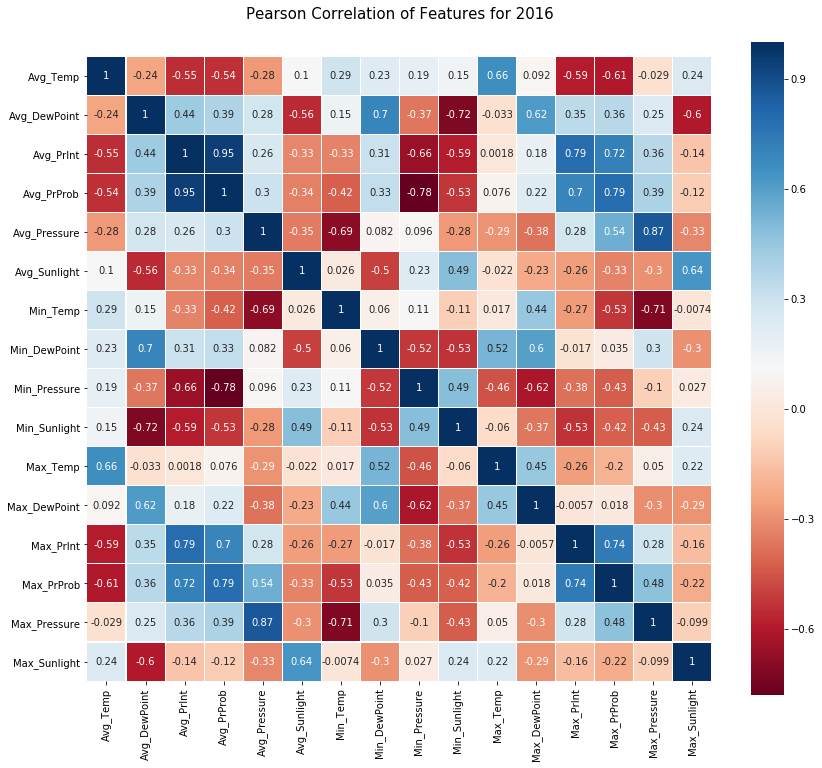

In [39]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features for 2016', y=1.05, size=15)
sns.heatmap(weather_yield.drop(['Year','Min_PrInt','Min_PrProb','Value'], axis =1).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [40]:
yield_2015 = weather_yield[weather_yield.Year == 2015]
yield_2015 = yield_2015[['County','Value']]
yield_2015 = yield_2015.rename(index=str, columns={"Value": "Yield 2015"})
yield_2015

,County,Yield 2015
24,San Joaquin,42.29
25,Kings,50.79
26,Merced,48.61
27,Kern,45.66
28,Solano,44.73
29,Stanislaus,43.05
30,Yolo,48.62
31,Fresno,50.89


In [41]:
# Merge with weather_2016 dataset
weather_2016 = pd.merge(weather_2016,yield_2015,on =['County'])
weather_2016 = weather_2016.drop(['State','Min_PrInt','Min_PrProb'], axis = 1)
weather_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015
0,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,1006.545420,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79
1,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,1002.607917,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62
2,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,1003.546667,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05
3,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,1002.524583,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73
4,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,1003.125830,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29
5,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,1004.561304,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61
6,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,1006.236520,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66
7,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,1006.263333,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89


### Get updated NDVI values

In [42]:
# Get updated NDVI and merge with weather_yield
filename = 'May_NDVI_Values.csv'
ndvi = pd.read_csv(filename)
ndvi.head()

,Year,County,NDVI
0,2016,Fresno,0.46
1,2016,Kern,0.54
2,2016,Kings,0.50
3,2016,Merced,0.54
4,2016,Stanislaus,0.62


In [43]:
weather_ndvi_2016 = pd.merge(weather_2016, ndvi,on =['County','Year'])
weather_ndvi_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015,NDVI
0,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79,0.50
1,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,...,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62,0.51
2,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05,0.62
3,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73,0.54
4,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29,0.59
5,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61,0.54
6,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66,0.54
7,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89,0.46


In [44]:
weather_ndvi_2016.to_csv('weather_ndvi_2016feb_jun.csv')

### 2017 Dataset - Weather, NDVI, Yield 2017, Yield 2016 

In [45]:
# Get weather
weather_2017 = weather_yield[weather_yield.Year == 2017]
weather_2017 = weather_2017.rename(index=str, columns={"Value": "Yield 2017"})
weather_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2017
8,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,...,993.770000,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,CALIFORNIA,41.63
9,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,...,994.845417,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,CALIFORNIA,43.08
10,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,994.860833,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,CALIFORNIA,39.62
11,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,994.647500,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,CALIFORNIA,42.35
12,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,998.614167,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,CALIFORNIA,51.88
13,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,998.464167,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,CALIFORNIA,51.33
14,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,998.390000,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,CALIFORNIA,50.39
15,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,996.388750,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,CALIFORNIA,47.95


In [46]:
# Add previous year's yield
yield_2016 = weather_yield[weather_yield.Year == 2016]
yield_2016 = yield_2016[['County','Value']]
yield_2016 = yield_2016.rename(index=str, columns={"Value": "Yield 2016"})
yield_2016

,County,Yield 2016
16,Kings,54.74
17,Yolo,46.90
18,Stanislaus,39.80
19,Solano,46.43
20,San Joaquin,45.83
21,Merced,47.74
22,Kern,46.40
23,Fresno,50.03


In [47]:
# Merge all into one dataset for 2017
weather_2017 = pd.merge(weather_2017,yield_2016,on =['County'])
weather_2017 = weather_2017.drop(['State','Min_PrInt','Min_PrProb'], axis = 1)
weather_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016
0,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,993.770000,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43
1,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,994.845417,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90
2,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,994.860833,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80
3,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,994.647500,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83
4,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,998.614167,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74
5,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,998.464167,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40
6,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,998.390000,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03
7,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,996.388750,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74


In [48]:
weather_ndvi_2017 = pd.merge(weather_2017, ndvi,on =['County', 'Year'])
weather_ndvi_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016,NDVI
0,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,...,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43,0.74
1,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,...,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90,0.62
2,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80,0.70
3,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83,0.66
4,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74,0.44
5,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40,0.54
6,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03,0.51
7,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74,0.65


In [49]:
weather_ndvi_2017.to_csv('weather_ndvi_2017feb_jun.csv')

### 2018 Dataset - Weather, NDVI, Yield 2017, Yield 2018

In [50]:
# Get weather
weather_2018 = weather_yield[weather_yield.Year == 2018]
weather_2018 = weather_2018.rename(index=str, columns={"Value": "Yield 2018"})
weather_2018

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2018
0,2018,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,...,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,CALIFORNIA,59.31
1,2018,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,...,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,CALIFORNIA,52.63
2,2018,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,...,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,CALIFORNIA,37.01
3,2018,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,...,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,CALIFORNIA,56.45
4,2018,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,...,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,CALIFORNIA,52.17
5,2018,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,...,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,CALIFORNIA,40.07
6,2018,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,...,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,CALIFORNIA,47.72
7,2018,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,...,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,CALIFORNIA,38.36


In [51]:
weather_ndvi_2018 = pd.merge(weather_2018, ndvi,on =['County','Year'])
weather_ndvi_2018

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2018,NDVI
0,2018,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,...,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,CALIFORNIA,59.31,0.51
1,2018,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,...,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,CALIFORNIA,52.63,0.51
2,2018,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,...,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,CALIFORNIA,37.01,0.51
3,2018,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,...,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,CALIFORNIA,56.45,0.43
4,2018,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,...,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,CALIFORNIA,52.17,0.55
5,2018,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,...,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,CALIFORNIA,40.07,0.58
6,2018,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,...,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,CALIFORNIA,47.72,0.60
7,2018,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,...,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,CALIFORNIA,38.36,0.58


In [52]:
yield_2017 = weather_ndvi_2017[['County','Yield 2017']]
yield_2017

,County,Yield 2017
0,Solano,41.63
1,Yolo,43.08
2,Stanislaus,39.62
3,San Joaquin,42.35
4,Kings,51.88
5,Kern,51.33
6,Fresno,50.39
7,Merced,47.95


In [53]:
weather_ndvi_2018 = pd.merge(weather_ndvi_2018, yield_2017,on =['County'])
weather_ndvi_2018

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2018,NDVI,Yield 2017
0,2018,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,...,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,CALIFORNIA,59.31,0.51,47.95
1,2018,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,...,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,CALIFORNIA,52.63,0.51,50.39
2,2018,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,...,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,CALIFORNIA,37.01,0.51,51.33
3,2018,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,...,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,CALIFORNIA,56.45,0.43,51.88
4,2018,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,...,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,CALIFORNIA,52.17,0.55,43.08
5,2018,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,...,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,CALIFORNIA,40.07,0.58,42.35
6,2018,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,...,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,CALIFORNIA,47.72,0.60,41.63
7,2018,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,...,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,CALIFORNIA,38.36,0.58,39.62


In [54]:
weather_ndvi_2018.to_csv('weather_ndvi_2018feb_jun.csv')

### 2019 Dataset - Weather, NDVI, Yield 2018

In [55]:
# Get weather for 2018
weather_2019 = weather_comb[weather_comb.Year == 2019]
#weather_2019 = weather_2019.drop(weather_2019.index[[1,2,4,6,9,11,14]])
#weather_2019 = weather_2019.drop(['Year','Min_PrInt','Min_PrProb'], axis = 1)
weather_2019

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_PrInt,Min_PrProb,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight
0,2019,Yolo,56.790117,44.158223,0.004325,0.100941,1014.808202,1.436492,40.855217,21.669565,0.0,0.0,999.420833,0.458333,76.536250,56.350417,0.083881,0.993182,1026.416667,2.500000
1,2019,Stanislaus,58.586093,45.164036,0.001892,0.066609,1014.861684,1.488243,42.535833,26.274348,0.0,0.0,1000.545455,0.500000,76.934167,55.735833,0.024717,0.585000,1026.284286,2.500000
2,2019,Solano,55.643172,44.535474,0.003721,0.093259,1014.992753,1.453429,41.224348,21.779130,0.0,0.0,999.261667,0.500000,74.459167,56.469167,0.075967,0.967619,1026.440833,2.541667
3,2019,San Joaquin,57.677041,44.942740,0.002466,0.083594,1014.872616,1.488322,42.511304,24.877826,0.0,0.0,1000.545455,0.458333,76.797083,55.802083,0.035652,0.618750,1026.284286,2.545455
4,2019,Merced,58.273710,46.032607,0.001370,0.042530,1014.947390,1.512169,41.235000,28.769565,0.0,0.0,1001.509583,0.541667,77.115417,56.960833,0.015646,0.423333,1026.125417,2.500000
5,2019,Kings,59.185280,44.051999,0.001038,0.049062,1015.678867,1.562174,40.867500,29.709583,0.0,0.0,1004.606667,0.583333,79.272917,55.024583,0.018058,0.495417,1026.898333,2.590909
6,2019,Kern,58.307626,38.912862,0.002785,0.050145,1014.881545,1.581220,37.794167,22.170000,0.0,0.0,1004.562000,0.583333,77.169167,52.827500,0.044643,0.555833,1025.662105,2.681818
7,2019,Fresno,59.628193,44.213586,0.002447,0.073037,1015.319010,1.542865,40.974167,28.487083,0.0,0.0,1003.739167,0.565217,80.240000,55.966667,0.042196,0.684583,1026.608333,2.590909


In [56]:
weather_ndvi_2019 = pd.merge(weather_2019, ndvi,on =['County','Year'])
weather_ndvi_2019

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_PrProb,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI
0,2019,Yolo,56.790117,44.158223,0.004325,0.100941,1014.808202,1.436492,40.855217,21.669565,...,0.0,999.420833,0.458333,76.536250,56.350417,0.083881,0.993182,1026.416667,2.500000,0.58
1,2019,Stanislaus,58.586093,45.164036,0.001892,0.066609,1014.861684,1.488243,42.535833,26.274348,...,0.0,1000.545455,0.500000,76.934167,55.735833,0.024717,0.585000,1026.284286,2.500000,0.65
2,2019,Solano,55.643172,44.535474,0.003721,0.093259,1014.992753,1.453429,41.224348,21.779130,...,0.0,999.261667,0.500000,74.459167,56.469167,0.075967,0.967619,1026.440833,2.541667,0.62
3,2019,San Joaquin,57.677041,44.942740,0.002466,0.083594,1014.872616,1.488322,42.511304,24.877826,...,0.0,1000.545455,0.458333,76.797083,55.802083,0.035652,0.618750,1026.284286,2.545455,0.66
4,2019,Merced,58.273710,46.032607,0.001370,0.042530,1014.947390,1.512169,41.235000,28.769565,...,0.0,1001.509583,0.541667,77.115417,56.960833,0.015646,0.423333,1026.125417,2.500000,0.57
5,2019,Kings,59.185280,44.051999,0.001038,0.049062,1015.678867,1.562174,40.867500,29.709583,...,0.0,1004.606667,0.583333,79.272917,55.024583,0.018058,0.495417,1026.898333,2.590909,0.45
6,2019,Kern,58.307626,38.912862,0.002785,0.050145,1014.881545,1.581220,37.794167,22.170000,...,0.0,1004.562000,0.583333,77.169167,52.827500,0.044643,0.555833,1025.662105,2.681818,0.52
7,2019,Fresno,59.628193,44.213586,0.002447,0.073037,1015.319010,1.542865,40.974167,28.487083,...,0.0,1003.739167,0.565217,80.240000,55.966667,0.042196,0.684583,1026.608333,2.590909,0.56


In [57]:
yield_2018 = weather_ndvi_2018[['County','Yield 2018']]
yield_2018

,County,Yield 2018
0,Merced,59.31
1,Fresno,52.63
2,Kern,37.01
3,Kings,56.45
4,Yolo,52.17
5,San Joaquin,40.07
6,Solano,47.72
7,Stanislaus,38.36


In [58]:
weather_ndvi_2019 = pd.merge(weather_ndvi_2019, yield_2018,on =['County'])
weather_ndvi_2019

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI,Yield 2018
0,2019,Yolo,56.790117,44.158223,0.004325,0.100941,1014.808202,1.436492,40.855217,21.669565,...,999.420833,0.458333,76.536250,56.350417,0.083881,0.993182,1026.416667,2.500000,0.58,52.17
1,2019,Stanislaus,58.586093,45.164036,0.001892,0.066609,1014.861684,1.488243,42.535833,26.274348,...,1000.545455,0.500000,76.934167,55.735833,0.024717,0.585000,1026.284286,2.500000,0.65,38.36
2,2019,Solano,55.643172,44.535474,0.003721,0.093259,1014.992753,1.453429,41.224348,21.779130,...,999.261667,0.500000,74.459167,56.469167,0.075967,0.967619,1026.440833,2.541667,0.62,47.72
3,2019,San Joaquin,57.677041,44.942740,0.002466,0.083594,1014.872616,1.488322,42.511304,24.877826,...,1000.545455,0.458333,76.797083,55.802083,0.035652,0.618750,1026.284286,2.545455,0.66,40.07
4,2019,Merced,58.273710,46.032607,0.001370,0.042530,1014.947390,1.512169,41.235000,28.769565,...,1001.509583,0.541667,77.115417,56.960833,0.015646,0.423333,1026.125417,2.500000,0.57,59.31
5,2019,Kings,59.185280,44.051999,0.001038,0.049062,1015.678867,1.562174,40.867500,29.709583,...,1004.606667,0.583333,79.272917,55.024583,0.018058,0.495417,1026.898333,2.590909,0.45,56.45
6,2019,Kern,58.307626,38.912862,0.002785,0.050145,1014.881545,1.581220,37.794167,22.170000,...,1004.562000,0.583333,77.169167,52.827500,0.044643,0.555833,1025.662105,2.681818,0.52,37.01
7,2019,Fresno,59.628193,44.213586,0.002447,0.073037,1015.319010,1.542865,40.974167,28.487083,...,1003.739167,0.565217,80.240000,55.966667,0.042196,0.684583,1026.608333,2.590909,0.56,52.63


In [59]:
weather_ndvi_2018.to_csv('weather_ndvi_2019feb_jun.csv')